<a href="https://colab.research.google.com/github/VarshiniB14/TextCategorization_PySpark/blob/main/TextCategorization_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=4090cb3b5c32864fba5225d380361ab0edd8ce08c43db2aa85a96b339adf936e
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

In [3]:
data = spark.read.csv("BDA.csv",inferSchema=True,header=True)
from pyspark.sql.functions import col

data = data.withColumn('label', col('label').cast('int'))
data = data.withColumn('rating(stars)', col('rating(stars)').cast('int'))
# Replace 'column_name' with the name of the column you want to convert


data.show()

+-----+-------------+--------------------+-------------+-----------+
|label|   Restaurant|              Review|rating(stars)|   Location|
+-----+-------------+--------------------+-------------+-----------+
|    1|  Eating Love|Loved the taste a...|            4|   Sarjapur|
|    1|  Eating Love|Loved the quality...|            5|   Sarjapur|
|    1|  Eating Love|Loved the food, s...|            5|   Sarjapur|
|    1|  Eating Love|This place is a b...|            3|   Sarjapur|
|    1|  Eating Love|Fabulous food, Ex...|            4|   Sarjapur|
|    1|Napoli Bistro|Good Food !! I ha...|            5|        HSR|
|    1|Napoli Bistro|very ordinary cru...|            1|        HSR|
|    1|Napoli Bistro|Cold pizza delive...|            1|        HSR|
|    1|Napoli Bistro|Absolutely fantas...|            5|        HSR|
|    1|Napoli Bistro|if you are someon...|            3|        HSR|
|    1|Napoli Bistro|I ordered the veg...|            3|        HSR|
|    1|Napoli Bistro|napoli bistro

In [4]:
data.printSchema()

root
 |-- label: integer (nullable = true)
 |-- Restaurant: string (nullable = true)
 |-- Review: string (nullable = true)
 |-- rating(stars): integer (nullable = true)
 |-- Location: string (nullable = true)



In [5]:
data= data.na.drop(subset=['label'])
data_no_missing_label = data.na.drop(subset=['label'])
dropped_rows = data.exceptAll(data_no_missing_label)
dropped_rows.show()

+-----+----------+------+-------------+--------+
|label|Restaurant|Review|rating(stars)|Location|
+-----+----------+------+-------------+--------+
+-----+----------+------+-------------+--------+



In [6]:
## No.of rows and columns in datafile
rows=data.count()
cols=len(data.columns)
print('rows:' , rows)
print('columns:' , cols)

rows: 260
columns: 5


In [7]:
#Concatenate 2 columns
from pyspark.sql.functions import concat_ws

df = data.select('label', concat_ws(' ',data.Restaurant, data.Review).alias('Text'))

df=df.select('label','Text')
df.show(10)

+-----+--------------------+
|label|                Text|
+-----+--------------------+
|    1|Eating Love Loved...|
|    1|Eating Love Loved...|
|    1|Eating Love Loved...|
|    1|Eating Love This ...|
|    1|Eating Love Fabul...|
|    1|Napoli Bistro Goo...|
|    1|Napoli Bistro ver...|
|    1|Napoli Bistro Col...|
|    1|Napoli Bistro Abs...|
|    1|Napoli Bistro if ...|
+-----+--------------------+
only showing top 10 rows



In [8]:
## remove null values:
from pyspark.sql.functions import col
df=df.filter(col("text").isNotNull())


In [9]:
# Tokenizer
from pyspark.ml.feature import Tokenizer
tokenizer =Tokenizer(inputCol="Text", outputCol="words")

# adds a column 'words' to df after tokenization
df = tokenizer.transform(df)

df.select(['label','Text', 'words']).show(10)

+-----+--------------------+--------------------+
|label|                Text|               words|
+-----+--------------------+--------------------+
|    1|Eating Love Loved...|[eating, love, lo...|
|    1|Eating Love Loved...|[eating, love, lo...|
|    1|Eating Love Loved...|[eating, love, lo...|
|    1|Eating Love This ...|[eating, love, th...|
|    1|Eating Love Fabul...|[eating, love, fa...|
|    1|Napoli Bistro Goo...|[napoli, bistro, ...|
|    1|Napoli Bistro ver...|[napoli, bistro, ...|
|    1|Napoli Bistro Col...|[napoli, bistro, ...|
|    1|Napoli Bistro Abs...|[napoli, bistro, ...|
|    1|Napoli Bistro if ...|[napoli, bistro, ...|
+-----+--------------------+--------------------+
only showing top 10 rows



In [10]:
# StopWord Removal
from pyspark.ml.feature import StopWordsRemover
stopwords_remover=StopWordsRemover(inputCol="words", outputCol="filtered")

# adds a column 'filtered' to df without stopwords
df = stopwords_remover.transform(df)

df.select(['label','Text', 'words', 'filtered']).show(10)

+-----+--------------------+--------------------+--------------------+
|label|                Text|               words|            filtered|
+-----+--------------------+--------------------+--------------------+
|    1|Eating Love Loved...|[eating, love, lo...|[eating, love, lo...|
|    1|Eating Love Loved...|[eating, love, lo...|[eating, love, lo...|
|    1|Eating Love Loved...|[eating, love, lo...|[eating, love, lo...|
|    1|Eating Love This ...|[eating, love, th...|[eating, love, pl...|
|    1|Eating Love Fabul...|[eating, love, fa...|[eating, love, fa...|
|    1|Napoli Bistro Goo...|[napoli, bistro, ...|[napoli, bistro, ...|
|    1|Napoli Bistro ver...|[napoli, bistro, ...|[napoli, bistro, ...|
|    1|Napoli Bistro Col...|[napoli, bistro, ...|[napoli, bistro, ...|
|    1|Napoli Bistro Abs...|[napoli, bistro, ...|[napoli, bistro, ...|
|    1|Napoli Bistro if ...|[napoli, bistro, ...|[napoli, bistro, ...|
+-----+--------------------+--------------------+--------------------+
only s

In [11]:
## TF-IDF
from pyspark.ml.feature import HashingTF, IDF # vectorizer
hashing_tf = HashingTF(inputCol="filtered",outputCol="raw_features",numFeatures=10000)

# adds raw tf features to df
featurized_data = hashing_tf.transform(df)

In [12]:
#Inverse document frequency
idf = IDF(inputCol="raw_features", outputCol="features")

idf_vectorizer = idf.fit(featurized_data)

# converting text to vectors
rescaled_data = idf_vectorizer.transform(featurized_data)

# top 20 rows
rescaled_data.select("label",'Text', 'words', 'filtered', "features").show()

+-----+--------------------+--------------------+--------------------+--------------------+
|label|                Text|               words|            filtered|            features|
+-----+--------------------+--------------------+--------------------+--------------------+
|    1|Eating Love Loved...|[eating, love, lo...|[eating, love, lo...|(10000,[903,3789,...|
|    1|Eating Love Loved...|[eating, love, lo...|[eating, love, lo...|(10000,[903,2252,...|
|    1|Eating Love Loved...|[eating, love, lo...|[eating, love, lo...|(10000,[20,903,15...|
|    1|Eating Love This ...|[eating, love, th...|[eating, love, pl...|(10000,[903,1989,...|
|    1|Eating Love Fabul...|[eating, love, fa...|[eating, love, fa...|(10000,[842,903,1...|
|    1|Napoli Bistro Goo...|[napoli, bistro, ...|[napoli, bistro, ...|(10000,[826,1023,...|
|    1|Napoli Bistro ver...|[napoli, bistro, ...|[napoli, bistro, ...|(10000,[2180,2710...|
|    1|Napoli Bistro Col...|[napoli, bistro, ...|[napoli, bistro, ...|(10000,[37

In [13]:
# Split Train/Test data
(train, test) = rescaled_data.randomSplit([0.75, 0.25],seed = 202)
print("Train Data: " + str(train.count()))
print("Test Data : " + str(test.count()))

Train Data: 189
Test Data : 71


In [14]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

Logistic Regression

In [15]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol='features',
                        labelCol='label',
                        family="multinomial",
                        regParam=0.2,
                        elasticNetParam=0,
                        maxIter=75)



lrModel = lr.fit(train)
predictions_lr = lrModel.transform(test)
predictions_lr.select("Text", 'probability','prediction', 'label').show()

+--------------------+--------------------+----------+-----+
|                Text|         probability|prediction|label|
+--------------------+--------------------+----------+-----+
|Bene I am super i...|[3.33130760887629...|       1.0|    1|
|Bene Wonderful pl...|[3.12947606635848...|       1.0|    1|
|Eating Love Fabul...|[3.28519105145141...|       1.0|    1|
|Fenny's Nice ambi...|[4.39339608578353...|       1.0|    1|
|Fenny's Visited f...|[5.41012693020837...|       1.0|    1|
|Little Italy  It'...|[4.14555958080280...|       1.0|    1|
|Little Italy  Lik...|[4.02591383343747...|       1.0|    1|
|Little Italy  Man...|[3.77495981139293...|       1.0|    1|
|Pasta Street  Pas...|[4.20142122133089...|       1.0|    1|
|Tiamo Best poolsi...|[4.12208348434263...|       1.0|    1|
|Tiamo Great servi...|[2.97930974471684...|       1.0|    1|
|Tiamo We had the ...|[1.91811523434016...|       1.0|    1|
|A2B Loved the tas...|[4.75133010978901...|       1.0|    2|
|A2B Very less sam...|[4

In [16]:
# to evalute model
evaluator= MulticlassClassificationEvaluator(predictionCol="prediction")

accuracy_lr=evaluator.evaluate(predictions_lr)
print(accuracy_lr)

0.7947361588888168


In [17]:
# Calculate precision
evaluator.setMetricName("weightedPrecision")
evaluator.evaluate(predictions_lr)

0.8898847631241997

In [18]:
# Calculate recall
evaluator.setMetricName("weightedRecall")
evaluator.evaluate(predictions_lr)

0.8028169014084507

In [19]:
# Calculate F1 score
evaluator.setMetricName("f1")
evaluator.evaluate(predictions_lr)

0.7947361588888168

Random Forest

In [20]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol='features', labelCol='label', numTrees=250, maxDepth=17, maxBins=32)
rf_model = rf.fit(train)
predictions_rf = rf_model.transform(test)
predictions_rf.select("Text", 'probability','prediction', 'label').show()

+--------------------+--------------------+----------+-----+
|                Text|         probability|prediction|label|
+--------------------+--------------------+----------+-----+
|Bene I am super i...|[0.0,0.3745901828...|       1.0|    1|
|Bene Wonderful pl...|[0.0,0.3825993656...|       1.0|    1|
|Eating Love Fabul...|[0.0,0.3441024360...|       1.0|    1|
|Fenny's Nice ambi...|[0.0,0.3598639763...|       1.0|    1|
|Fenny's Visited f...|[0.0,0.3385960656...|       1.0|    1|
|Little Italy  It'...|[0.0,0.3533635509...|       1.0|    1|
|Little Italy  Lik...|[0.0,0.3914164056...|       1.0|    1|
|Little Italy  Man...|[0.0,0.3849218584...|       1.0|    1|
|Pasta Street  Pas...|[0.0,0.4081459692...|       1.0|    1|
|Tiamo Best poolsi...|[0.0,0.3517412421...|       1.0|    1|
|Tiamo Great servi...|[0.0,0.3469166765...|       1.0|    1|
|Tiamo We had the ...|[0.0,0.3673055453...|       1.0|    1|
|A2B Loved the tas...|[0.0,0.2847246908...|       1.0|    2|
|A2B Very less sam...|[0

In [21]:
evaluator = MulticlassClassificationEvaluator(metricName='accuracy')
accuracy_rf = evaluator.evaluate(predictions_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)


Random Forest Classifier Accuracy: 0.8873239436619719


In [22]:
# Calculate precision
evaluator.setMetricName("weightedPrecision")
evaluator.evaluate(predictions_rf)

0.9249275557652132

In [24]:
# Calculate recall
evaluator.setMetricName("weightedRecall")
evaluator.evaluate(predictions_rf)

0.8873239436619719

In [25]:
# Calculate F1 score
evaluator.setMetricName("f1")
evaluator.evaluate(predictions_rf)

0.8783040373226652

Decision Tree

In [26]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 10)
dtModel = dt.fit(train)

#Prediction
predictions_dt = dtModel.transform(test)

predictions_dt.select("Text", 'probability','prediction', 'label').show()

+--------------------+--------------------+----------+-----+
|                Text|         probability|prediction|label|
+--------------------+--------------------+----------+-----+
|Bene I am super i...|[0.0,0.5058823529...|       1.0|    1|
|Bene Wonderful pl...|[0.0,0.5058823529...|       1.0|    1|
|Eating Love Fabul...|[0.0,0.5058823529...|       1.0|    1|
|Fenny's Nice ambi...|[0.0,0.5058823529...|       1.0|    1|
|Fenny's Visited f...|[0.0,0.5058823529...|       1.0|    1|
|Little Italy  It'...|[0.0,0.5058823529...|       1.0|    1|
|Little Italy  Lik...|[0.0,0.5058823529...|       1.0|    1|
|Little Italy  Man...|[0.0,0.5058823529...|       1.0|    1|
|Pasta Street  Pas...|[0.0,0.5058823529...|       1.0|    1|
|Tiamo Best poolsi...|[0.0,0.5058823529...|       1.0|    1|
|Tiamo Great servi...|[0.0,0.5058823529...|       1.0|    1|
|Tiamo We had the ...|[0.0,0.5058823529...|       1.0|    1|
|A2B Loved the tas...|[0.0,0.0,1.0,0.0,...|       2.0|    2|
|A2B Very less sam...|[0

In [27]:
#Evaluating the performance
evaluator = MulticlassClassificationEvaluator()
evaluator.setLabelCol("label")
evaluator.setPredictionCol("prediction")

accuracy_dt=evaluator.evaluate(predictions_dt)
print(accuracy_dt)

0.724034725594949


In [28]:
# Calculate precision
evaluator.setMetricName("weightedPrecision")
evaluator.evaluate(predictions_dt)

0.8924455825864277

In [29]:
# Calculate recall
evaluator.setMetricName("weightedRecall")
evaluator.evaluate(predictions_dt)

0.7042253521126761

In [30]:
# Calculate F1 score
evaluator.setMetricName("f1")
evaluator.evaluate(predictions_dt)

0.724034725594949

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt


Text(0, 0.5, 'Accuracy')

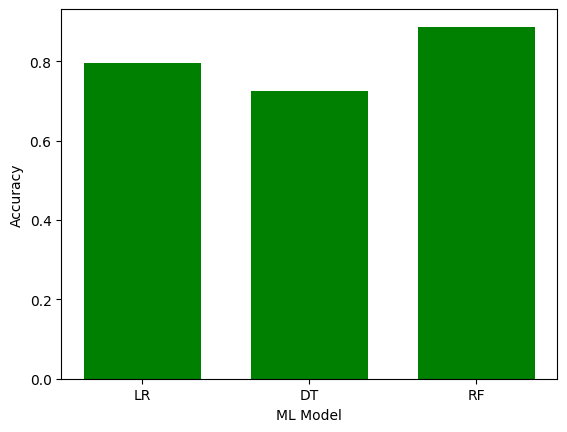

In [32]:
x=['LR','DT','RF']
y=[accuracy_lr,accuracy_dt,accuracy_rf]

plt.bar(x,y,width=0.7,color='green')
plt.xlabel("ML Model")
plt.ylabel("Accuracy")



In [33]:
# Create a dictionary to map label numbers to cuisine names
cuisine_labels = {
    1: 'italian',
    2: 'indian',
    3: 'mexican',
    4: 'korean',
    5: 'chinese'
}

# Display the cuisine labels and their names
print("Cuisine Labels and Names:")
for label, cuisine in cuisine_labels.items():
    print(f"{label}\t{cuisine}")


Cuisine Labels and Names:
1	italian
2	indian
3	mexican
4	korean
5	chinese


In [34]:
label_input = int(input("Enter the label (1, 2, 3, 4, or 5) for the cuisine you want  "))
from pyspark.sql.functions import avg, col

# Group by 'label' and 'Restaurant', calculate the average rating for each restaurant
avg_ratings_df = data.groupBy('label', 'Restaurant','Location').agg(avg(col('rating(stars)')).alias('avg_rating'))

# Filter the restaurants with average ratings above 3.5 for the specified cuisine (label_input)
filtered_avg_ratings_df = avg_ratings_df.filter((avg_ratings_df['avg_rating'] > 4) & (avg_ratings_df['label'] == label_input))

# Show the filtered DataFrame with restaurants having average ratings above 3.5 for the specified cuisine
filtered_avg_ratings_df.show()


Enter the label (1, 2, 3, 4, or 5) for the cuisine you want  2
+-----+--------------------+------------+-----------------+
|label|          Restaurant|    Location|       avg_rating|
+-----+--------------------+------------+-----------------+
|    2|        Vishnu grand|    Sarjapur|              5.0|
|    2|Chulha Chauki Da ...|    JP Nagar|4.181818181818182|
|    2|          Paakashala|     MG Road|              4.4|
|    2|    Moti Mahal Delux|         HSR|              4.2|
|    2|          Halli Mane|Malleshwaram|4.142857142857143|
|    2|            Karnatic|   Church St|              4.4|
+-----+--------------------+------------+-----------------+



In [35]:
%%writefile app.py

import streamlit as st
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, HashingTF, IDF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import concat_ws
from PIL import Image

# Create SparkSession
spark = SparkSession.builder.appName("StreamlitDemo").getOrCreate()

# Load dataset
df1= spark.read.csv("BDA.csv", inferSchema=True, header=True)
# df1 = df1.withColumnRenamed('Class Index', 'label')
df = spark.read.csv("BDA.csv", inferSchema=True, header=True)
# df = df.withColumnRenamed('Class Index', 'label')
df = df.withColumn("Text", concat_ws(" ", df.Restaurant, df.Review))
df = df.select('label', 'Text')

# Tokenizer
tokenizer = RegexTokenizer(inputCol="Text", outputCol="words", pattern="\\W")
# Stopwords remover
stopwords_remover = StopWordsRemover(inputCol="words", outputCol="filtered")
# Term frequency
hashing_tf = HashingTF(inputCol="filtered", outputCol="raw_features", numFeatures=10000)

# Inverse Document Frequency - vectorizer
idf = IDF(inputCol="raw_features", outputCol="features")

# Model
rf = RandomForestClassifier(featuresCol='features', labelCol='label', family="multinomial", regParam=0.3, elasticNetParam=0, maxIter=50)

# Create pipeline
pipeline = Pipeline(stages=[tokenizer, stopwords_remover, hashing_tf, idf, rf])

# Fit the pipeline to training documents
pipelineFit = pipeline.fit(df)

# Transform the dataset
dataset = pipelineFit.transform(df)

# Define label-category mapping
label_mapping = {
    1: "Italian",
    2: "Indian",
    3: "Mexican",
    4: "Korean",
    5: "Chinese"
}

# Define a function to display predictions
@st.cache
def show_predictions(dataset, num_predictions=10):
    predictions = dataset.select("Text", "prediction").take(num_predictions)
    for prediction in predictions:
        text = prediction.Text
        prediction_label = int(prediction.prediction)
        category = label_mapping.get(prediction_label, "Unknown")
        st.write("Text:", text)
        st.write("Label:", prediction_label)
        st.write("Category:", category)
        st.write("--------------------")

image_paths = {
    1: "italian.png",
    2: "indian.png",
    3: "mexican.png",
    4: "korean.png",
    5: "chinese.png"
}
# Streamlit app
def main():
    image = Image.open("logo.png")
    st.sidebar.image(image, use_column_width=False)
    st.title("Restaurant Review Classification")
    # st.sidebar.title("Options")

    # User input
    user_input = st.text_input("Enter your text", "")

    if user_input:
        # Create a Spark DataFrame from the user input
        input_df = spark.createDataFrame([(0, user_input)], ["label", "Text"])
        # Transform the user input using the pipeline
        input_dataset = pipelineFit.transform(input_df)
        # Predict the label for the user input
        prediction = input_dataset.select("Text", "prediction").first()
        # Display the prediction
        text = prediction.Text
        prediction_label = int(prediction.prediction)
        category = label_mapping.get(prediction_label, "Unknown")
        st.write("Input Text:", text)
        st.write("Label:", prediction_label)
        st.write("Category:", category)
        image_path = image_paths.get(prediction_label)
        if image_path:
            image = Image.open(image_path)
            st.sidebar.image(image, use_column_width=True)
        st.write("--------------------")

    # Display predictions
    cuisine_input = st.text_input("Enter cuisine label to get restaurant recommendations", "")
    if cuisine_input:
        cuisine_label = int(cuisine_input)
        if cuisine_label in label_mapping:
            selected_cuisine = label_mapping[cuisine_label]
            st.write("Restaurant Recommendations for", selected_cuisine)
           # recommended_restaurants = data.filter((data['Class Index'] == cuisine_label) & (data['rank'] <= 3)).select('Restaurant')
           # recommended_restaurants=recommended_restaurants.dropDuplicates()
            selected_restaurants = df1.filter((df1.label == cuisine_label)& (df1['rank'] <= 3)).select("Restaurant").distinct()
            for row in selected_restaurants.collect():
                st.write("- " + row.Restaurant)
        else:
            st.write("Invalid cuisine label. Please enter a valid label.")


if __name__ == "__main__":
    main()






Writing app.py


In [36]:
!pip install pyngrok
from pyngrok import ngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=b502a18735addfd9a302c7b34efcd5597f21a69a8218452a5adc745dc156bc02
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [39]:
!ngrok authtoken 2QMPMg2l91w7PQQgLvLMI9725dr_7oX73Wabue7BRM2REnbAz  # give your AuthToken from your ngrok account

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [38]:
!streamlit run app.py &>/dev/null&

In [40]:
!pip install pyngrok
from pyngrok import ngrok

In [41]:
ngrok_tunnel = ngrok.connect(3000)
ngrok_tunnel

<NgrokTunnel: "https://f0c4-34-85-224-46.ngrok-free.app" -> "http://localhost:3000">